In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
epoch = datetime.utcfromtimestamp(0)

In [35]:
with open("data.txt") as f:
    lines = f.readlines()
lines[12:]

['Thu May 20 13:00:18.006\t225789828   \tThu May 20 13:00:18.006\t2033721867  \n',
 'Thu May 20 13:00:18.072\t225789828   \tThu May 20 13:00:18.072\t2033721867  \n',
 'Thu May 20 13:00:18.139\t225789828   \tThu May 20 13:00:18.139\t2033721867  \n',
 'Thu May 20 13:00:18.206\t225789828   \tThu May 20 13:00:18.206\t2033721867  \n',
 'Thu May 20 13:00:18.272\t225789828   \tThu May 20 13:00:18.272\t2033721867  \n',
 'Thu May 20 13:00:18.339\t225789828   \tThu May 20 13:00:18.339\t2033721867  \n',
 'Thu May 20 13:00:18.405\t225789828   \tThu May 20 13:00:18.405\t2033721867  \n',
 'Thu May 20 13:00:18.472\t225789828   \tThu May 20 13:00:18.472\t2033721867  \n',
 'Thu May 20 13:00:18.539\t225789828   \tThu May 20 13:00:18.539\t2033721867  \n',
 'Thu May 20 13:00:18.605\t225789828   \tThu May 20 13:00:18.605\t2033721867  \n',
 'Thu May 20 13:00:18.672\t225789828   \tThu May 20 13:00:18.672\t2033721867  \n',
 'Thu May 20 13:00:18.739\t225789828   \tThu May 20 13:00:18.739\t2033721867  \n',
 'Th

In [36]:
'Thu May 20 13:05:18.018\t225802769   \tThu May 20 13:05:18.018\t2033739070  \n'[:-1].split('\t')

['Thu May 20 13:05:18.018',
 '225802769   ',
 'Thu May 20 13:05:18.018',
 '2033739070  ']

In [48]:
for_dic = []
for line in lines[12:]:
    dtime, c1, _, c2 = line[:-1].split('\t')
    for_dic.append({"datetime": datetime.strptime('2021 ' + dtime, "%Y %a %b %d %H:%M:%S.%f"),
                    "raw_counts1": int(c1),
                    "raw_counts2": int(c2)})
df = pd.DataFrame(for_dic)
mindtime = df['datetime'].min()
minc1 = df['raw_counts1'].min()
minc2 = df['raw_counts2'].min()
df['time_sec'] = (df['datetime'] - mindtime).astype(np.int64)*1e-9
df['counts1'] = df['raw_counts1'] - minc1
df['counts2'] = df['raw_counts2'] - minc2
step = 30
df['dc1'] = df['counts1'].diff(step)
df['dc2'] = df['counts2'].diff(step)
df['dt'] = df['time_sec'].diff(step)
df['rate1'] = df['dc1']/df['dt']
df['rate2'] = df['dc2']/df['dt']
df

,datetime,raw_counts1,raw_counts2,time_sec,counts1,counts2,dc1,dc2,dt,rate1,rate2
0,2021-05-20 13:00:18.006,225789828,2033721867,0.000,0,0,NaN,NaN,NaN,NaN,NaN
1,2021-05-20 13:00:18.072,225789828,2033721867,0.066,0,0,NaN,NaN,NaN,NaN,NaN
2,2021-05-20 13:00:18.139,225789828,2033721867,0.133,0,0,NaN,NaN,NaN,NaN,NaN
3,2021-05-20 13:00:18.206,225789828,2033721867,0.200,0,0,NaN,NaN,NaN,NaN,NaN
4,2021-05-20 13:00:18.272,225789828,2033721867,0.266,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13495,2021-05-20 13:15:17.709,225863579,2033805860,899.703,73751,83993,0.0,0.0,2.000,0.0,0.0
13496,2021-05-20 13:15:17.776,225863579,2033805860,899.770,73751,83993,0.0,0.0,2.001,0.0,0.0
13497,2021-05-20 13:15:17.842,225863579,2033805860,899.836,73751,83993,0.0,0.0,2.000,0.0,0.0
13498,2021-05-20 13:15:17.909,225863579,2033805860,899.903,73751,83993,0.0,0.0,2.000,0.0,0.0


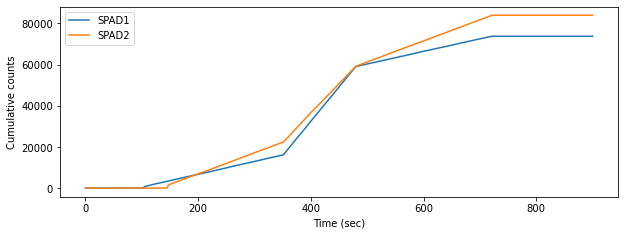

In [45]:
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(df['time_sec'], df['counts1'], label='SPAD1')
ax.plot(df['time_sec'], df['counts2'], label='SPAD2')
ax.legend()
ax.set_ylabel('Cumulative counts')
ax.set_xlabel('Time (sec)')
plt.show()

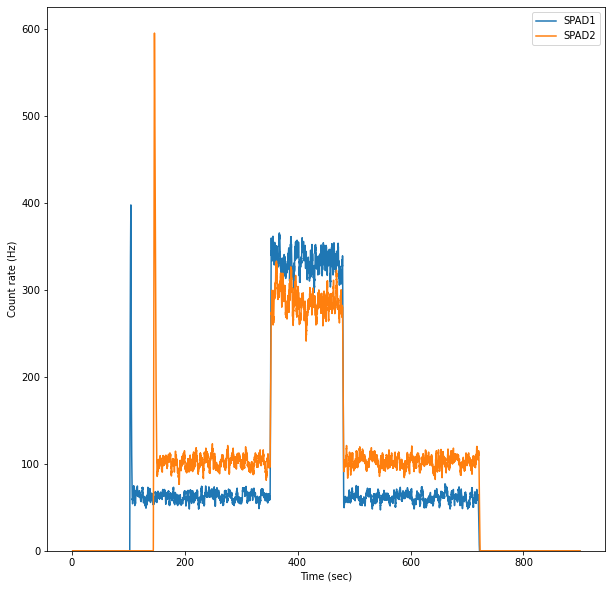

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df['time_sec'], df['rate1'], label='SPAD1')
ax.plot(df['time_sec'], df['rate2'], label='SPAD2')
ax.legend()
ax.set_ylabel('Count rate (Hz)')
ax.set_xlabel('Time (sec)')
ax.set_ylim(0, ax.get_ylim()[1])
plt.show()